C:\Users\oscarandres.pinilla\AppData\Local\Temp\ipykernel_19976\1790852379.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscarandres.pinilla\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscarandres.pinilla\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


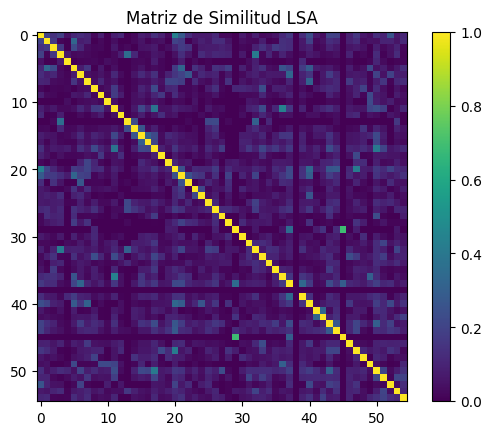

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

df_ref = pd.read_csv('df_ref.csv')  

primer_articulo = df_ref['article'][0]
primer_resumen = df_ref['abstract'][0]

oraciones = sent_tokenize(primer_articulo)

stop_words = set(stopwords.words('english'))
palabras = [word.lower() for sentence in oraciones for word in word_tokenize(sentence) if word.isalnum() and word.lower() not in stop_words]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(oraciones)

lsa = TruncatedSVD(n_components=100, random_state=42)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

similarity_matrix = cosine_similarity(lsa_matrix, lsa_matrix)

plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.title('Matriz de Similitud LSA')
plt.colorbar()
plt.show()

In [3]:
import numpy as np

indice_mas_representativo = np.argmax(similarity_matrix.sum(axis=1))

oraciones_mas_similares = np.argsort(similarity_matrix[indice_mas_representativo])[::-1]

longitud_resumen = 5

resumen_indices = oraciones_mas_similares[:longitud_resumen]
resumen = [oraciones[i] for i in sorted(resumen_indices)]

print("Resumen:")
for oracion in resumen:
    print(oracion)

Resumen:
direct central nervous system ( cns ) involvement in hodgkin 's lymphoma is extremely rare with an incidence of approximately 0.02% , though primary manifestations of hodgkin 's lymphoma in meninges , cerebral fluid   or the brain parenchyma   are known .
direct involvement of the cns in hodgkin 's lymphoma is rare , with an incidence of about 0.02% , and to our knowledge has never been described in nlphl .
paraneoplastic angiitis is extremely rare in hodgkin 's lymphoma patients but has been described in a small series with poor outcome .
it has to be stressed , however , that liquor cytology is not sensitive and specific enough to establish or rule out the diagnosis of direct cns involvement of hodgkin 's lymphoma .
on the other hand , to our knowledge there is no case of nlphl documented with direct cns involvement [ 1 , 4 ] .
